Neural Network trained on 3 second feature set


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import csv

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

In [ ]:
song_dir =os.listdir('/content/drive/My Drive/RP/genres')

In [ ]:
dataset_path ='/content/drive/My Drive/Colab Notebooks/RP/feature extraction/25.3/Data_10seg.csv'

master_data = pd.read_csv(dataset_path) 
master_data.head()



,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,rolloff_max,rolloff_min,rolloff_mean,rolloff_std,rolloff_kurtosis,rolloff_skew,flux_max,flux_min,flux_mean,flux_std,flux_kurtosis,flux_skew,rmse_max,rmse_min,rmse_mean,rmse_std,rmse_kurtosis,rmse_skew,zcr_max,zcr_min,zcr_mean,zcr_std,zcr_kurtosis,zcr_skew,contrast_max,contrast_min,contrast_mean,contrast_std,contrast_kurtosis,contrast_skew,bandwidth_max,bandwidth_min,bandwidth_mean,bandwidth_std,...,mfcc_6_std,mfcc_6_kurtosis,mfcc_6_skew,mfcc_7_max,mfcc_7_min,mfcc_7_mean,mfcc_7_std,mfcc_7_kurtosis,mfcc_7_skew,mfcc_8_max,mfcc_8_min,mfcc_8_mean,mfcc_8_std,mfcc_8_kurtosis,mfcc_8_skew,mfcc_9_max,mfcc_9_min,mfcc_9_mean,mfcc_9_std,mfcc_9_kurtosis,mfcc_9_skew,mfcc_10_max,mfcc_10_min,mfcc_10_mean,mfcc_10_std,mfcc_10_kurtosis,mfcc_10_skew,mfcc_11_max,mfcc_11_min,mfcc_11_mean,mfcc_11_std,mfcc_11_kurtosis,mfcc_11_skew,mfcc_12_max,mfcc_12_min,mfcc_12_mean,mfcc_12_std,mfcc_12_kurtosis,mfcc_12_skew,genre
0,2968.610553,849.658283,1544.599741,375.803588,1.831593,0.885106,5124.902344,1152.026367,2923.463604,885.025317,-0.580839,0.136526,8.759687,0.0,1.673339,2.042800,2.179828,1.733197,0.133169,0.021886,0.080475,0.025623,-0.657055,-0.079778,0.190918,0.036133,0.086009,0.028843,2.138670,1.110720,45.732313,8.504636,21.857460,6.934282,0.460795,0.903689,1988.241864,1186.624526,1578.929816,198.308260,...,7.343157,0.279836,-0.245533,16.085646,-21.092693,-0.045477,7.397243,-0.263076,-0.234852,4.270060,-32.617149,-14.467911,7.470672,-0.471515,0.129063,35.907036,-11.864138,3.204973,8.351996,2.065392,1.171183,19.338140,-32.714924,-19.285934,8.435503,7.219372,2.304931,28.912182,-12.308210,2.815688,8.808426,-0.260792,0.575162,12.387854,-28.359610,-10.360458,10.190949,-0.724335,0.354533,blues
1,4429.203787,907.213204,2388.580024,905.798802,-0.714752,0.241953,6890.625000,1367.358398,4544.582520,1599.046449,-0.827402,-0.498110,8.783724,0.0,1.362969,1.329510,9.201735,2.577901,0.288371,0.013944,0.112698,0.069025,-0.434302,0.681183,0.365723,0.033691,0.147994,0.080016,-0.294200,0.735440,54.700207,7.934002,22.485827,9.107351,1.708504,1.423087,2555.903287,1244.600989,1967.856374,346.393644,...,13.217931,-0.062808,-0.812195,25.972910,-23.918947,7.619702,10.936044,-0.794936,-0.228306,21.045078,-43.906151,-18.526569,15.031443,0.118298,0.817024,30.541256,-19.761093,6.837147,11.492730,-0.580217,-0.381661,0.232399,-36.592163,-17.526182,8.070435,-0.502971,-0.172180,24.164585,-25.312050,-5.920010,8.267508,0.725408,0.270310,19.701296,-21.291504,-3.452553,10.564160,-0.824106,0.241367,blues
2,3920.272603,1033.019916,2097.306892,641.573280,-0.537890,0.391426,6793.725586,1604.223633,4234.007474,1380.422189,-1.120051,-0.069798,12.446646,0.0,1.622100,2.203782,7.413245,2.599538,0.228752,0.010686,0.097500,0.060494,-0.820085,0.524261,0.270508,0.030762,0.107741,0.046625,1.098290,1.133656,47.703467,7.770299,21.436428,8.704255,1.395805,1.407812,2657.946803,1342.833693,1965.804096,299.918228,...,10.595219,2.919454,-1.232423,31.932796,-9.238714,11.541316,10.228969,-1.151476,-0.025551,10.531494,-43.282532,-19.102686,13.371345,-0.935848,0.282861,22.897808,-7.069962,6.450355,8.402604,-1.137287,0.101380,-2.642356,-35.036060,-18.482765,7.005689,-0.535371,-0.211210,18.304348,-17.814165,-1.694399,6.966511,-0.179246,0.425301,16.281624,-26.752865,-6.195611,8.952841,-0.399917,0.148912,blues
3,3041.000699,1072.820372,1990.354892,518.423250,-1.102732,-0.114362,5921.630859,1722.656250,3912.665828,1143.723499,-1.013715,-0.411620,10.960407,0.0,1.704432,2.023815,4.507105,2.091851,0.197585,0.039848,0.102549,0.039995,-0.481531,0.561519,0.250000,0.057129,0.116095,0.041049,1.555917,1.277675,47.919475,5.914184,21.976961,8.148538,0.874961,1.120064,2318.260773,1169.677329,1767.231727,296.499584,...,8.654659,-0.426573,-0.394457,35.603943,-14.904453,5.250053,11.874259,-0.306106,0.715131,17.805515,-44.041222,-13.371712,13.097857,0.051051,-0.004489,30.755449,-8.647285,8.999457,10.627526,-1.143588,0.059382,14.695620,-39.088749,-16.1

In [ ]:
master_data.shape

(10000, 133)

In [ ]:

y = master_data['genre']
X = master_data.drop(columns=['genre'])

In [ ]:
#scaling data

#scale = StandardScaler()
#x_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

#transform all the values in range between (0 to 1) .... x = [(value - min)/(Max- Min)]

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(X))

In [ ]:
#x_scaled.head()

In [ ]:

#encode the genres:
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)

In [ ]:
#y_enc
#genre_list.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_enc, test_size=0.2)

check to see if equal segments of the song are in train and test - in prescribed ratio

In [ ]:
len(y_train)

8000

In [ ]:
len(y_test)

2000

Implementing Neural Network


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

#activation - ‘softmax’ (makes the output sum up to 1 so the output can be interpreted as probabilities)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               68096     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 241,226
Trainable params: 241,226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=30,batch_size=32, callbacks=[early_stopping_monitor])

Epoch 1/30
250/250 [==============================] - 3s 8ms/step - loss: 1.7499 - accuracy: 0.3427 - val_loss: 1.1659 - val_accuracy: 0.5770
Epoch 2/30
250/250 [==============================] - 1s 6ms/step - loss: 1.1643 - accuracy: 0.5640 - val_loss: 1.0819 - val_accuracy: 0.6010
Epoch 3/30
250/250 [==============================] - 1s 6ms/step - loss: 0.9753 - accuracy: 0.6532 - val_loss: 0.9518 - val_accuracy: 0.6585
Epoch 4/30
250/250 [==============================] - 1s 6ms/step - loss: 0.9117 - accuracy: 0.6768 - val_loss: 0.8974 - val_accuracy: 0.6845
Epoch 5/30
250/250 [==============================] - 1s 6ms/step - loss: 0.8554 - accuracy: 0.6870 - val_loss: 0.8302 - val_accuracy: 0.7155
Epoch 6/30
250/250 [==============================] - 1s 6ms/step - loss: 0.7805 - accuracy: 0.7146 - val_loss: 0.8275 - val_accuracy: 0.7110
Epoch 7/30
250/250 [==============================] - 1s 5ms/step - loss: 0.7434 - accuracy: 0.7341 - val_loss: 0.7659 - val_accuracy: 0.7335
Epoch 

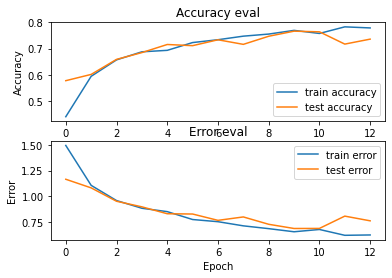

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)

In [ ]:
from keras import models, layers, regularizers
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))

model.add(layers.Dense(256, activation='relu'))
layers.Dropout(0.3),

model.add(layers.Dense(128, activation='relu'))
layers.Dropout(0.3),

model.add(layers.Dense(64, activation='relu'))
layers.Dropout(0.3),

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               68096     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 241,226
Trainable params: 241,226
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)


history = model.fit(x_train,y_train,validation_data=(x_test, y_test),epochs=120,batch_size=128)

Epoch 1/120
63/63 [==============================] - 2s 17ms/step - loss: 1.9210 - accuracy: 0.3233 - val_loss: 1.2591 - val_accuracy: 0.5280
Epoch 2/120
63/63 [==============================] - 1s 9ms/step - loss: 1.2373 - accuracy: 0.5365 - val_loss: 1.1988 - val_accuracy: 0.5525
Epoch 3/120
63/63 [==============================] - 1s 9ms/step - loss: 1.1184 - accuracy: 0.5948 - val_loss: 1.0250 - val_accuracy: 0.6305
Epoch 4/120
63/63 [==============================] - 1s 9ms/step - loss: 1.0036 - accuracy: 0.6348 - val_loss: 1.0607 - val_accuracy: 0.5995
Epoch 5/120
63/63 [==============================] - 1s 10ms/step - loss: 0.9341 - accuracy: 0.6698 - val_loss: 0.9503 - val_accuracy: 0.6585
Epoch 6/120
63/63 [==============================] - 1s 10ms/step - loss: 0.8611 - accuracy: 0.6980 - val_loss: 0.8504 - val_accuracy: 0.6905
Epoch 7/120
63/63 [==============================] - 1s 10ms/step - loss: 0.8183 - accuracy: 0.7116 - val_loss: 0.8777 - val_accuracy: 0.6895
Epoch 8/1

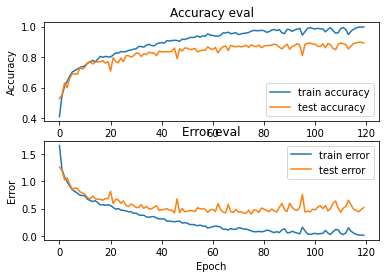

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

predictions = model.predict(
      x=x_test
    , batch_size=10
    , verbose=0)  

#for i in predictions:
    #print(i)

rounded_predictions = np.argmax(predictions, axis=-1)
#for i in rounded_predictions:
    #print(i)    

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[173   1   6   0   0   3   0   0   4   2]
 [  0 169   4   0   0   8   0   0   0   1]
 [  4   0 177   0   2   5   0   2   4   4]
 [  4   1   3 193   2   0   0   1   7   6]
 [  3   0   1   5 180   0   2   3  13   3]
 [  3   3   9   0   0 185   0   2   4   4]
 [  2   1   1   1   1   1 176   0   0  15]
 [  0   0   4   2   1   1   0 175   6   5]
 [  1   0   1   2   0   1   0   4 173   2]
 [  2   0  15   7   0   2   3   2   5 182]]


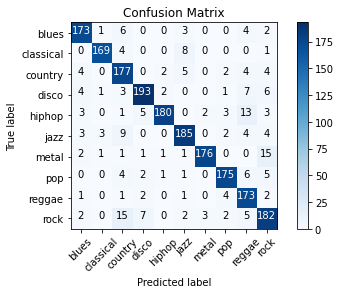

In [ ]:
cm_plot_labels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')